In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=40, centers=2, random_state=20)
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

SVC(kernel='linear')

(0.011005031489794481, 10.397388255961692) (3.292297885573241, 10.33419897277097)


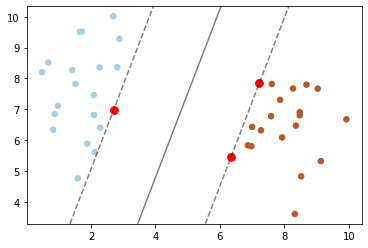

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)
#초평면 vygus
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
print(xlim, ylim)
#get_xlim()은 양 끝값 출력
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
#print(XX, YY)

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
#경계선과 hyperplane 그리기
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
#support vector를 그리는 가장 가까운 데이터 plot
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=60, facecolors='r')
plt.show()

In [25]:
#linear을 rbf롤 변경해서 kernel 조절
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=40, centers=2, random_state=20)
clf = svm.SVC(kernel='rbf')
clf.fit(X, Y)

SVC()

(0.011005031489794481, 10.397388255961692) (3.292297885573241, 10.33419897277097)


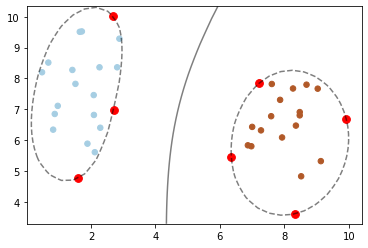

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)
#초평면 vygus
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
print(xlim, ylim)
#get_xlim()은 양 끝값 출력
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
#print(XX, YY)

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
#경계선과 hyperplane 그리기
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
#support vector를 그리는 가장 가까운 데이터 plot
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=60, facecolors='r')
plt.show()

In [42]:
from sklearn.datasets import load_iris
import pandas as pd
Iris = load_iris()
Iris_frame = pd.DataFrame(data=np.c_[Iris['data'], Iris['target']], columns=Iris['feature_names']+['target'])
Iris_frame['target'] = Iris_frame['target']. map({0:'setosa', 1:'versicolor', 2:'virginica'})
X = Iris_frame.iloc[:, :12]
Y = Iris_frame.iloc[:, [-1]]
Iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [60]:
clf = svm.SVC(kernel='linear')
import matplotlib.colors as colors
df1 = Iris_frame[['sepal length (cm)', 'sepal width (cm)', 'target']]
X = df1.iloc[:, :2]
Y = df1.iloc[:, 2].replace({'setosa':0, 'versicolor':1, 'virginica':2}).copy()

clf.fit(X, Y)
print(X, Y)

     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns] 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


/home/poco/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


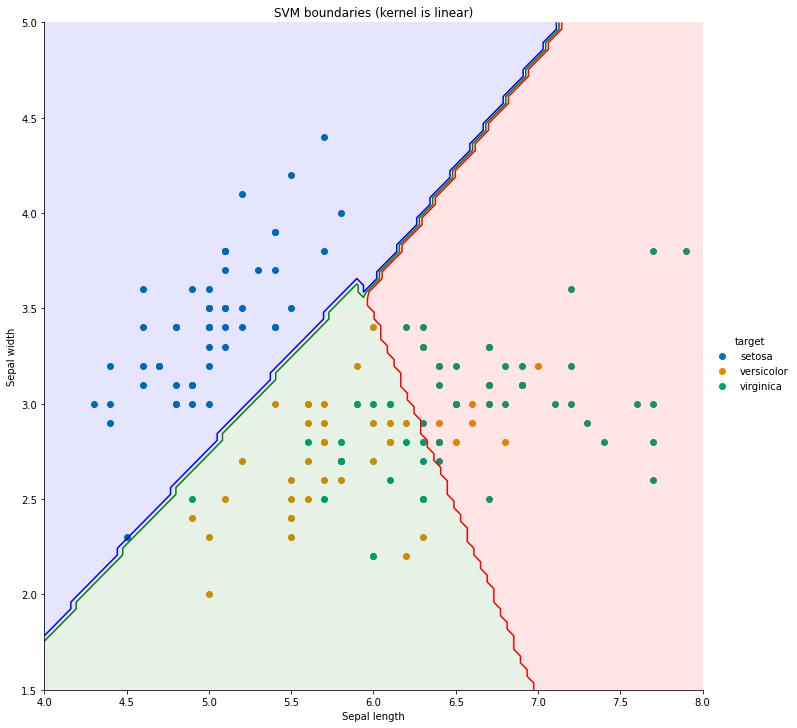

In [61]:
import seaborn as sns
N = 100
X_ = np.linspace(4, 8, N)
Y_ = np.linspace(1.5, 5, N)
X_, Y_ = np.meshgrid(X_, Y_)
#print(X_, Y_)
color_list = ['Blues', 'Greens', "Reds"]
my_norm = colors.Normalize(vmin=-1., vmax=1.)
g = sns.FacetGrid(Iris_frame, 
                  hue='target', 
                  size=10, 
                  palette='colorblind').map(plt.scatter,
                                           'sepal length (cm)',
                                           'sepal width (cm)').add_legend()

my_ax = g.ax
zz = np.array([clf.predict([[xx, yy]])[0] for xx, yy in zip(np.ravel(X_), np.ravel(Y_))])
Z = zz.reshape(X_.shape)
my_ax.contourf(X_, Y_, Z, 2, alpha=.1, colors=('blue', 'green', 'red'))
my_ax.contour(X_, Y_, Z, 2, alpha=1, colors=('blue', 'green', 'red'))

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('SVM boundaries (kernel is linear)')

plt.show()

In [56]:
clf = svm.SVC(kernel='poly')
import matplotlib.colors as colors
df1 = Iris_frame[['sepal length (cm)', 'sepal width (cm)', 'target']]
X = df1.iloc[:, :2]
Y = df1.iloc[:, 2].replace({'setosa':0, 'versicolor':1, 'virginica':2}).copy()

clf.fit(X, Y)
print(X, Y)

     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns] 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


/home/poco/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


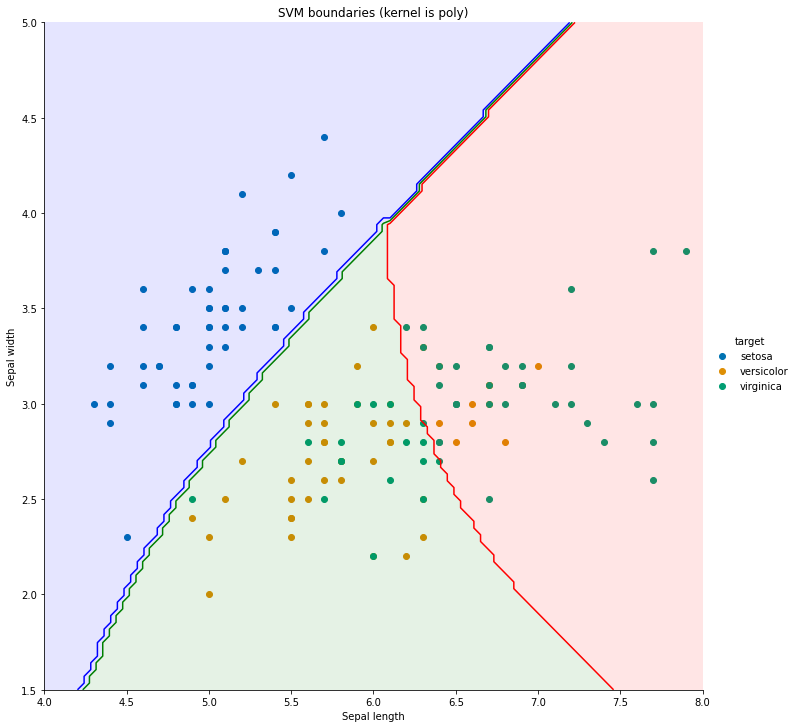

In [58]:
import seaborn as sns
N = 100
X_ = np.linspace(4, 8, N)
Y_ = np.linspace(1.5, 5, N)
X_, Y_ = np.meshgrid(X_, Y_)
#print(X_, Y_)
color_list = ['Blues', 'Greens', "Reds"]
my_norm = colors.Normalize(vmin=-1., vmax=1.)
g = sns.FacetGrid(Iris_frame, 
                  hue='target', 
                  size=10, 
                  palette='colorblind').map(plt.scatter,
                                           'sepal length (cm)',
                                           'sepal width (cm)').add_legend()

my_ax = g.ax
zz = np.array([clf.predict([[xx, yy]])[0] for xx, yy in zip(np.ravel(X_), np.ravel(Y_))])
Z = zz.reshape(X_.shape)
my_ax.contourf(X_, Y_, Z, 2, alpha=.1, colors=('blue', 'green', 'red'))
my_ax.contour(X_, Y_, Z, 2, alpha=1, colors=('blue', 'green', 'red'))

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('SVM boundaries (kernel is poly)')

plt.show()

In [62]:
clf = svm.SVC(kernel='sigmoid')
import matplotlib.colors as colors
df1 = Iris_frame[['sepal length (cm)', 'sepal width (cm)', 'target']]
X = df1.iloc[:, :2]
Y = df1.iloc[:, 2].replace({'setosa':0, 'versicolor':1, 'virginica':2}).copy()

clf.fit(X, Y)
print(X, Y)

     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns] 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


/home/poco/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


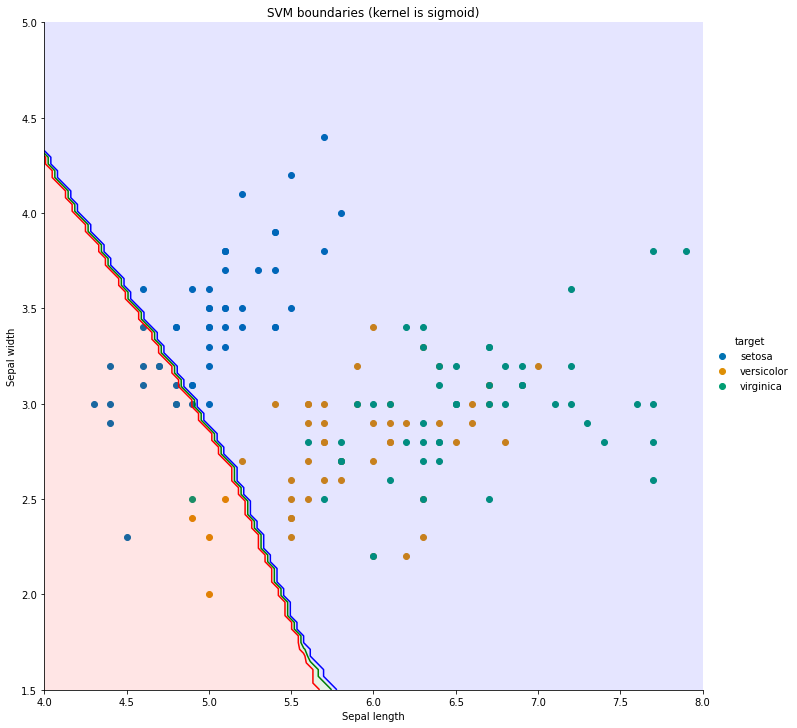

In [64]:
import seaborn as sns
N = 100
X_ = np.linspace(4, 8, N)
Y_ = np.linspace(1.5, 5, N)
X_, Y_ = np.meshgrid(X_, Y_)
#print(X_, Y_)
color_list = ['Blues', 'Greens', "Reds"]
my_norm = colors.Normalize(vmin=-1., vmax=1.)
g = sns.FacetGrid(Iris_frame, 
                  hue='target', 
                  size=10, 
                  palette='colorblind').map(plt.scatter,
                                           'sepal length (cm)',
                                           'sepal width (cm)').add_legend()

my_ax = g.ax
zz = np.array([clf.predict([[xx, yy]])[0] for xx, yy in zip(np.ravel(X_), np.ravel(Y_))])
Z = zz.reshape(X_.shape)
my_ax.contourf(X_, Y_, Z, 2, alpha=.1, colors=('blue', 'green', 'red'))
my_ax.contour(X_, Y_, Z, 2, alpha=1, colors=('blue', 'green', 'red'))

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('SVM boundaries (kernel is sigmoid)')

plt.show()